### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [20]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [21]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [13]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [14]:
query = '마동석'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://image.cine21.com/resize/cine21/person/2018/0102/10_49_31__5a4ae52b79ba3[W680-].jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/22638B4C582ECAD124)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://image.chosun.com/sitedata/image/201306/25/2013062500374_0.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://opgg-com-image.akamaized.net/attach/images/20190227041553.680266.jpeg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://image.chosun.com/sitedata/image/202005/28/2020052802149_0.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://img.tf.co.kr/article/home/2019/11/06/201922311573025989.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg)
[Error] Invalid image, not saving https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Info] Issue getting: https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d

* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [15]:
query = '김종국'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202205/10/poctan/20220510215708148ukvv.png)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202205/10/SpoChosun/20220510213133877fejm.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/a3/cd/98/a3cd988a52a0bc9309d299ae3abf058a.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://blog.kakaocdn.net/dn/b9ouhg/btrBxa7Baiu/lwkNDTrbPuKzJUk9VNw9i0/img.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://lh3.googleusercontent.com/blogger_img_proxy/ABLy4ExtlZDJ7KRYBk41Ue4urcowPvQnoSwSFGzzCo4X03YjkppUlrCC244ESNMoy_BT5THGvuCKi5T2T4W6GbxgnSsi5PkeGwvIno7CVL79R0W6P9v98UzQuIPNjuhOh9qyngDncExh6iTiDT88K3_pvV4=w1200-h630-p-k-no-nu)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://eventsmoa.com/wp-content/uploads/2022/05/f11e0cc8-f5ac-48ff-9184-7a63078bbf46.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (h

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [16]:
query = '이병헌'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://file.mk.co.kr/meet/neds/2015/11/image_readtop_2015_1090336_14478055192220185.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.hankyung.com/photo/201911/BF.21014258.1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://newsroom.etomato.com/userfiles/03-0432.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://image.newdaily.co.kr/site/data/img/2014/09/05/2014090500080_thumb.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img3.yna.co.kr/photo/yna/YH/2019/12/12/PYH2019121210030001300_P4.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://sccdn.chosun.com/news/html/2019/08/16/2019081601001255600084111.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2017/01/20170116113255_1005565_600_900.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2018/06/26/201806261597030565_1.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2019/12/19/

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

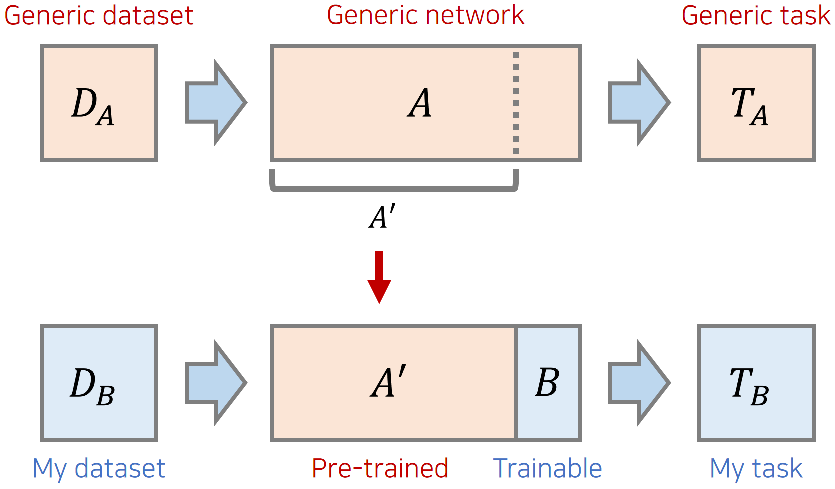

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [24]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 98
테스트 데이터셋 크기: 32
클래스: ['김종국', '마동석', '이병헌']


* 간단히 이미지를 시각화해 봅시다.

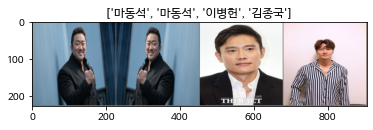

In [25]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [26]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Sanghoon/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100.0%


* 학습을 진행합니다.

In [27]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.0913 Acc: 51.0204% Time: 15.7905s
#1 Loss: 0.5800 Acc: 68.3673% Time: 31.4939s
#2 Loss: 0.3149 Acc: 89.7959% Time: 47.1782s
#3 Loss: 0.2835 Acc: 88.7755% Time: 63.0457s
#4 Loss: 0.2483 Acc: 86.7347% Time: 78.6354s
#5 Loss: 0.2665 Acc: 90.8163% Time: 94.5634s
#6 Loss: 0.3988 Acc: 82.6531% Time: 110.6794s
#7 Loss: 0.2697 Acc: 88.7755% Time: 126.8200s
#8 Loss: 0.3561 Acc: 84.6939% Time: 142.5679s
#9 Loss: 0.1569 Acc: 94.8980% Time: 159.2171s
#10 Loss: 0.3416 Acc: 88.7755% Time: 175.6361s
#11 Loss: 0.2140 Acc: 88.7755% Time: 191.5142s
#12 Loss: 0.2224 Acc: 91.8367% Time: 207.8657s
#13 Loss: 0.1809 Acc: 93.8776% Time: 223.4562s
#14 Loss: 0.1243 Acc: 94.8980% Time: 239.1206s
#15 Loss: 0.1211 Acc: 94.8980% Time: 255.2540s
#16 Loss: 0.1054 Acc: 94.8980% Time: 271.7479s
#17 Loss: 0.1700 Acc: 90.8163% Time: 287.8163s
#18 Loss: 0.2802 Acc: 94.8980% Time: 303.6960s
#19 Loss: 0.2566 Acc: 91.8367% Time: 319.6433s
#20 Loss: 0.2805 Acc: 90.8163% Time: 335.8451s
#21 Loss: 0.0529 Acc: 97.9592

* 모델 저장

In [41]:
model_path = "C://coding//face2//dataset//train//cnn_model.pt"
torch.save(model, model_path)

* 학습된 모델을 평가합니다.

[예측 결과: 김종국] (실제 정답: 김종국)


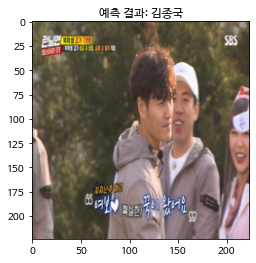

[예측 결과: 김종국] (실제 정답: 김종국)


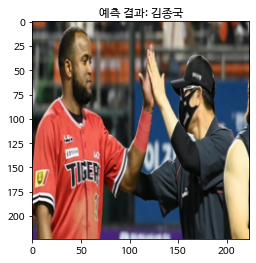

[예측 결과: 마동석] (실제 정답: 마동석)


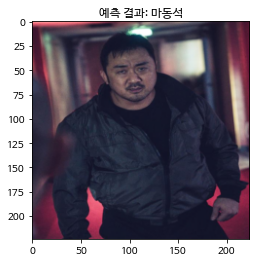

[예측 결과: 김종국] (실제 정답: 김종국)


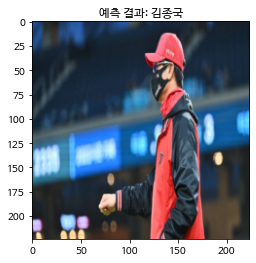

[예측 결과: 이병헌] (실제 정답: 이병헌)


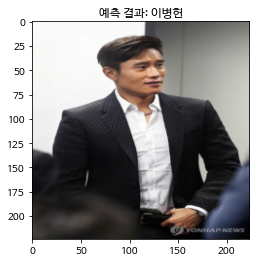

[예측 결과: 이병헌] (실제 정답: 이병헌)


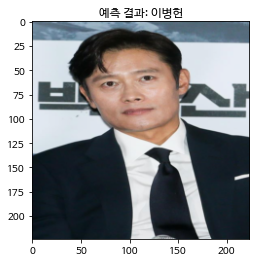

[예측 결과: 김종국] (실제 정답: 김종국)


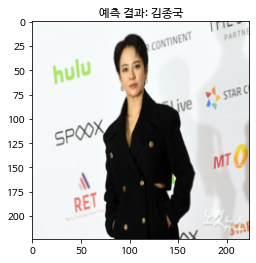

[예측 결과: 김종국] (실제 정답: 김종국)


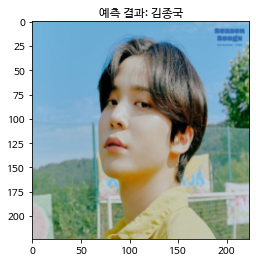

[Test Phase] Loss: 0.0645 Acc: 96.8750% Time: 4.1803s


In [50]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [45]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [46]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.jpg'

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [47]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

     ---------------------------------------- 95.2/95.2 KB 5.7 MB/s eta 0:00:00
     -------------------------------------- 224.9/224.9 KB 6.9 MB/s eta 0:00:00


In [48]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

In [49]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


 * Running on http://760d-221-160-181-4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.